## Digit Recognizer

*Bu çalışmamızda 0-9 arasındaki tek basamaklı sayıları CNN yapısı ile birlikte tensorflow , keras kütüphanelerini kullanarak tanıma işlemi gerçekleştiriyor olacağız.*

In [2]:
# Tensorflow ekleme
import tensorflow as tf
tf.__version__

'2.8.0'

### Veri setlerini yükleme

*Veri setlerini kerasın içerisinden yüklüyor olacağız dışardan çekmeyeceğiz.*

In [3]:
# El yazısı ile yazılmış 0-9 arasında rakamlar bulunmaktadır.[28x28 boyutlarındadır]
mnist = tf.keras.datasets.mnist

### Veri setini train ve test olarak bölme

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

*Keras kütüphanesi üzerinden yüklediğimiz 28x28 boyuntaki el yazısı ile yazılmışmış birbirinden farklı numara resimlerini modellemek için test ve train olarak ayırma işlemi gerçekleştirdikr.*

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Veri setlerindeki resimleri matplotlib kütüphanesi ile gösterme

*Matplotlib kütüphanesi içerisinden imshow fonksiyonu kullanıyor olacağız.*

In [6]:
# matplotlib
import matplotlib.pyplot as plt
# uyarı almamak için
import warnings
warnings.filterwarnings('ignore')

x_train ve x_test dizileri aslında 60000 değer içerir ve her bir değer bir resimi temsil eder ve bu resimler matrix şeklinde belirtilmiştir.

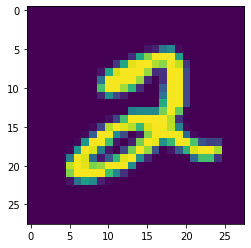

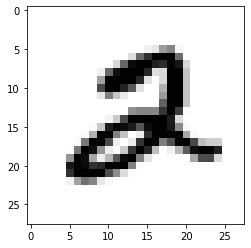

In [7]:
# Bazı resimleri gösterme

# dizideki 5 indexe sahip resim
plt.imshow(x_train[5])
plt.show()

plt.imshow(x_train[5], cmap=plt.cm.binary)
plt.show()
# cmap=plt.cm.binary --> arka planı kaldırır ve resmi sadeleştirir

In [ ]:
print(x_train[5])

### Resimler üzerinde normalization işlemi gerçekleştirme

*Normalizasyon işlemi her bir resim üzerinde bir ölçeklendirme gibi düşünebiliriz değerlerini belli bir aralığa getirerek resimin daha uygun formata döndürür.Aslında yaptını işlem şudur* **X_train / 255** ,*255 değerine bölmemizin sebebi RGB aralığı 0-255 arasındadır.* 

*Normalizasyon işlemi için keras kütüphanesi kullanıyoruz.*

***data_set = keras.utilis.normalize(data_set , axis = 1)***

In [8]:
# Normalizasyon işlemi gerçekleştirmek
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)

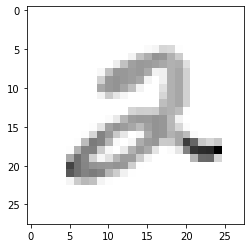

In [9]:
plt.imshow(x_train[5] , cmap=plt.cm.binary)
plt.show()

*Yukarıda görüldüğü üzere normalizasyon işleminden sonra plt.cm.binary de kullanarak gri resim şeklini aslında elde etmiş oluyoruz.*

### Evrişim işlemi için görüntüyü tekrardan boyutlandırma işlemi gerçekleştirme

In [10]:
# numpy 
import numpy as np

In [11]:
# filter işlemi için bir boyutun artırılması
x_trainr = np.array(x_train).reshape(-1 , 28 , 28 ,1)
x_testr = np.array(x_test).reshape(-1 ,28 , 28, 1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


*28x28 boyutunda derinliği 1 olan 60000 ve 10000 fotoğraf var demektir.*

### CNN modeli kurulum adımları ve evrişim işlemi , maxPooling işlemleri

In [13]:
# CNN nesnesini oluşturduğumuz kısımdır ve oluşturduğumuz nesne ile birlikte diğer adımları gerçekleştiriyor olacağız.
cnn = tf.keras.models.Sequential()

In [14]:
# 1.Convulation [Evirişim işlemi]
cnn.add(tf.keras.layers.Conv2D(filters = 64 ,kernel_size= 3, activation = 'relu' , input_shape = [28, 28, 1]))
# 1.Pooling İşlemi [Max Pooling]
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# 2.Convulation [Evirişim işlemi]
cnn.add(tf.keras.layers.Conv2D(filters = 64 ,kernel_size= 3, activation = 'relu'))
# 2.Pooling İşlemi [Max Pooling]
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# 3.Convulation [Evirişim işlemi]
cnn.add(tf.keras.layers.Conv2D(filters = 64 ,kernel_size= 3, activation = 'relu'))
# 3.Pooling İşlemi [Max Pooling]
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Yapay sinir ağı oluşturmak için son adım olarak işlemlerin sonucunu tek boyutlu matrix yani vektör haline getirir.
cnn.add(tf.keras.layers.Flatten())

* *Convulation işleminin ilkinde sadece input_shape parameresi girilir onun dışında girilmez*
* *pool_size , kernel_size parametlerinde yazılan değer aslında boyut belirtir ve kaç yazılmış ise kaça kaçlık olduğunu belitiriz (2,2) ,(3,3) şeklinde.*

### Yapay sinir ağı modeli oluşturma [Full Connected]

In [15]:
# First layer
cnn.add(tf.keras.layers.Dense(units=64 , activation='relu'))

# Second layer 
cnn.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))

# Output Layer
cnn.add(tf.keras.layers.Dense(units = 10 , activation = 'softmax'))

*Her bir katman eklerken nöron sayısı düşürdük (genellikle böyle yapılır modellemerde) son output katmanı eklerden nöron sayısı olarak 10 dedik bunun sebebi 0-9 arasında çıktıya sahip olmamızdır eğer bir kedi veya köpek tanıtma işlemi gerçekleştiriyor olsaydık o zaman activation olarak sigmoid ve units olarak 1 derdik çünkü ya köpek çıkıcak ya da kedi fakay bu problemimizde çoklu bir sonuç var birden fazla sonucun arasından bize bir değer dönderecektir bu gibi problemler için ise softmax aktivasyon fonksiyonu daha iyi olacaktır.*

In [16]:
cnn.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

CNN derleme işlemi gerçekleştiriyor olacağız.Bunun için **cnn.compile()** fonksiyonunu kullanıyor olacağız.

**optimizer:** optime eden fonksiyondur ve en iyilerinden biri **adam** fonksiyonudur.

**loss:**: kayıp fonksiyonu şuan biz veri setimizde binary bir sonuç yani (ikili bir sonuc 0 ve 1 den oluşan) değer alacağımız için 
**sparse_categorical_crossentropy** kullanmamız uygun olacaktır fakat kategorik bir output alacak isek **category_crossentropy** kullanmamız gerecektir veya binary yani ikili sonuç alacak olursak **binary_crossentropy** kullanırız.

**metrics**: eğitim sırasında görmek istediğimiz metrics türlerini bir liste içerisinde yazabilir şuan için accuracy(yani doğruluk skorunu) yazdık fakat araştırarak diğer metrics türlerinide yazabiliriz.

In [17]:
cnn.fit(x_trainr , y_train ,epochs=5 , validation_split=0.3)

Epoch 1/5


2022-03-12 19:00:18.379429: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 131712000 exceeds 10% of free system memory.


1313/1313 [==============================] - ETA: 0s - loss: 0.3296 - accuracy: 0.8966

2022-03-12 19:00:40.061553: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 56448000 exceeds 10% of free system memory.


1313/1313 [==============================] - 24s 18ms/step - loss: 0.3296 - accuracy: 0.8966 - val_loss: 0.1257 - val_accuracy: 0.9621
Epoch 2/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.1005 - accuracy: 0.9697 - val_loss: 0.1023 - val_accuracy: 0.9684
Epoch 3/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0728 - accuracy: 0.9775 - val_loss: 0.0777 - val_accuracy: 0.9779
Epoch 4/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0563 - accuracy: 0.9821 - val_loss: 0.0742 - val_accuracy: 0.9782
Epoch 5/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0450 - accuracy: 0.9855 - val_loss: 0.0707 - val_accuracy: 0.9798


* ***Bulduğumuz accuracy score ve val_accuracy değerlerini birbirlerini yakın olmamılar eğer accuracy > val_accuracy ise ve aralarında oldukça fark var ise overfitting dediğimiz olay gerçekleşir.***
* *accuracy değeri oldukça iyi bir sonuç geldi bu modelimizi kayıt edebiliriz.*

### Model tahmin işlemleri ve modele genel bir bakış

In [18]:
# Modelimiz tahmin sonuçlarını bir değişkene aktarıyoruz
predictions = cnn.predict(x_testr)

In [19]:
predictions

array([[2.9273016e-07, 3.0731492e-06, 1.5712001e-06, ..., 9.9999273e-01,
        1.5690505e-07, 1.5528668e-06],
       [6.6001498e-04, 2.3415847e-05, 9.9930251e-01, ..., 1.2693151e-05,
        1.1113889e-07, 1.3540722e-07],
       [1.5439817e-06, 9.9996901e-01, 1.5896725e-06, ..., 2.9417779e-06,
        5.9948484e-06, 5.8954635e-07],
       ...,
       [1.1536351e-11, 7.9305545e-07, 1.2247067e-08, ..., 1.0348202e-07,
        8.2852836e-08, 8.0380073e-07],
       [7.7020240e-06, 5.7728442e-07, 1.3829948e-06, ..., 1.7499958e-06,
        1.4779552e-04, 3.2658001e-05],
       [6.3137559e-05, 3.1593139e-08, 2.7056842e-05, ..., 6.3990750e-09,
        2.7555529e-06, 3.3362977e-07]], dtype=float32)

*Bu değerler sırasıyla aslında tahmin sonuçlarıdır bunları label değişkeni ile kıyaslamamız gerekmektedir mesala y_test[0] değeri predictions[0] değerini eşit mi diye bakarak tahmin edebiliriz fakat predictions üzerinde bir işlem yaparak bu eşitliği sorgulayabiliriz.*
* ***np.argmax(predictions[0]) =? y_test[0]***
* *numpy kütüphanesi kullanarak label değerini sorgulayabiliriz.*

In [21]:
# tahmin etme
print(y_test[0])
print(np.argmax(predictions[0]))

7
7


*Gördüğümüz üzere tahmin etme işlemini başarılı bir şekilde gerçekleştirmiş olduk.*

In [28]:
# tahmin etme 2
print(y_test[128])
print(np.argmax(predictions[128]))

8
8


In [29]:
# modele genel bir bakış
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)        

---